# Do changes bring difference: A comparative study of Manchester United’s performance after sacking Jose Mourinho

Angie Liang, Sam Zhang, Zizhen Guo

## Introduction
Jose Mourinho, the controversial “special one” (Tatiana, et al.) was sacked by Manchester United by December 18, 2018 ([BBC](https://www.bbc.com/sport/football/46603018)). The Portuguese manager joined the England Premier League solikccer club in May 2016, and took the charge for more than 2 years. Jose is broadly recognized as one of the greatest all-time soccer managers ([ESPN, 2013](https://web.archive.org/web/20131023073918/http://espnfc.com/news/story/_/id/1514848/)).

<img src="https://d1e00ek4ebabms.cloudfront.net/production/9820b6b0-3292-4003-915f-dad20b7395f9.jpg" alt="jose" style="zoom:20%;" />

### Purpose
**Our target in this study is to quantitatively evaluate the effectiveness of Manchester United sacking Jose Mourinho by comparing the means and standard deviations of goal difference in the United's matches before and after the change with bootstrapping and hypothesis testing.** Therefore, goal difference in each match will be investigated as a simplified process of the ELO system (Hvattum & Arntzen, 2009). This will examine whether or not such a decision significantly improves the United’ performance in Premier League. 

### Dataset
We procecced with the [Premier League results dataset](https://www.football-data.co.uk/englandm.php). After wrangling in the **Preliminary Results** section, our dataset `league_results` record Manchester United’ goal differences in 76 matches over season 2016/17 and 2017/18 coached by Jose Mourinho (`coach == 'old`), and 76 matches in season 19/20 and 20/21 coached by Ole Gunnar Solskjær (`coach == 'new'`), who replaced Jose’s position in December, 2018. 

## Preliminary Results

In [1]:
# loading required packeges
library(tidyverse)
library(repr)
library(digest)
library(infer)
require(gridExtra)
library(cowplot)

# suppress warnings
options(warn=-1)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: gridExtra
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘gridExtra’”

### Import raw data from [football-data.co.uk](https://www.football-data.co.uk/englandm.php) and wrangle the format

In [2]:
league_20_21 <- 
    read.csv('https://www.football-data.co.uk/mmz4281/2021/E0.csv') %>% 
    filter(HomeTeam == 'Man United' | AwayTeam == 'Man United') %>%
    mutate(goal_diff = (FTHG - FTAG) * (HomeTeam == 'Man United') +
              (FTAG - FTHG) * (AwayTeam == 'Man United')) %>% 
    select(goal_diff)

league_19_20 <- 
    read.csv('https://www.football-data.co.uk/mmz4281/1920/E0.csv') %>% 
    select(Date, HomeTeam, AwayTeam, FTHG, FTAG) %>%
    filter(HomeTeam == 'Man United' | AwayTeam == 'Man United') %>%
    mutate(goal_diff = (FTHG - FTAG) * (HomeTeam == 'Man United') +
              (FTAG - FTHG) * (AwayTeam == 'Man United')) %>%
    select(goal_diff)

league_17_18 <- 
    read.csv('https://www.football-data.co.uk/mmz4281/1718/E0.csv') %>% 
    select(Date, HomeTeam, AwayTeam, FTHG, FTAG) %>%
    filter(HomeTeam == 'Man United' | AwayTeam == 'Man United') %>%
    mutate(goal_diff = (FTHG - FTAG) * (HomeTeam == 'Man United') +
              (FTAG - FTHG) * (AwayTeam == 'Man United')) %>% 
    select(goal_diff)

league_16_17 <- 
    read.csv('https://www.football-data.co.uk/mmz4281/1617/E0.csv') %>% 
    select(Date, HomeTeam, AwayTeam, FTHG, FTAG) %>%
    filter(HomeTeam == 'Man United' | AwayTeam == 'Man United') %>%
    mutate(goal_diff = (FTHG - FTAG) * (HomeTeam == 'Man United') +
              (FTAG - FTHG) * (AwayTeam == 'Man United')) %>%
    select(goal_diff)

old_coach <- rbind(league_16_17, league_17_18) %>% mutate(coach = 'old') 
new_coach <- rbind(league_19_20, league_20_21) %>% mutate(coach = 'new')

league_results <- rbind(old_coach, new_coach)
head(league_results)

goal_diff,coach
2,old
2,old
1,old
-1,old
-2,old
3,old


### Parameters and sample distribution

In [37]:
# find observed statistics for each parameter
obs_stat <- league_results %>%
    group_by(coach) %>%
    summarize(mean = mean(goal_diff), 
             sd = sd(goal_diff), 
             n = n())
obs_stat

# find obersed difference
# in standard deviations
obs_diff_sd <- obs_diff_mean <- obs_stat$sd[1] - obs_stat$sd[2]
obs_diff_mean
# in means
obs_diff_mean <- obs_stat$mean[1] - obs_stat$mean[2]
obs_diff_mean

coach,mean,sd,n
new,0.7763158,1.915541,76
old,0.8552632,1.537998,76


[1] 0.377543

[1] -0.07894737

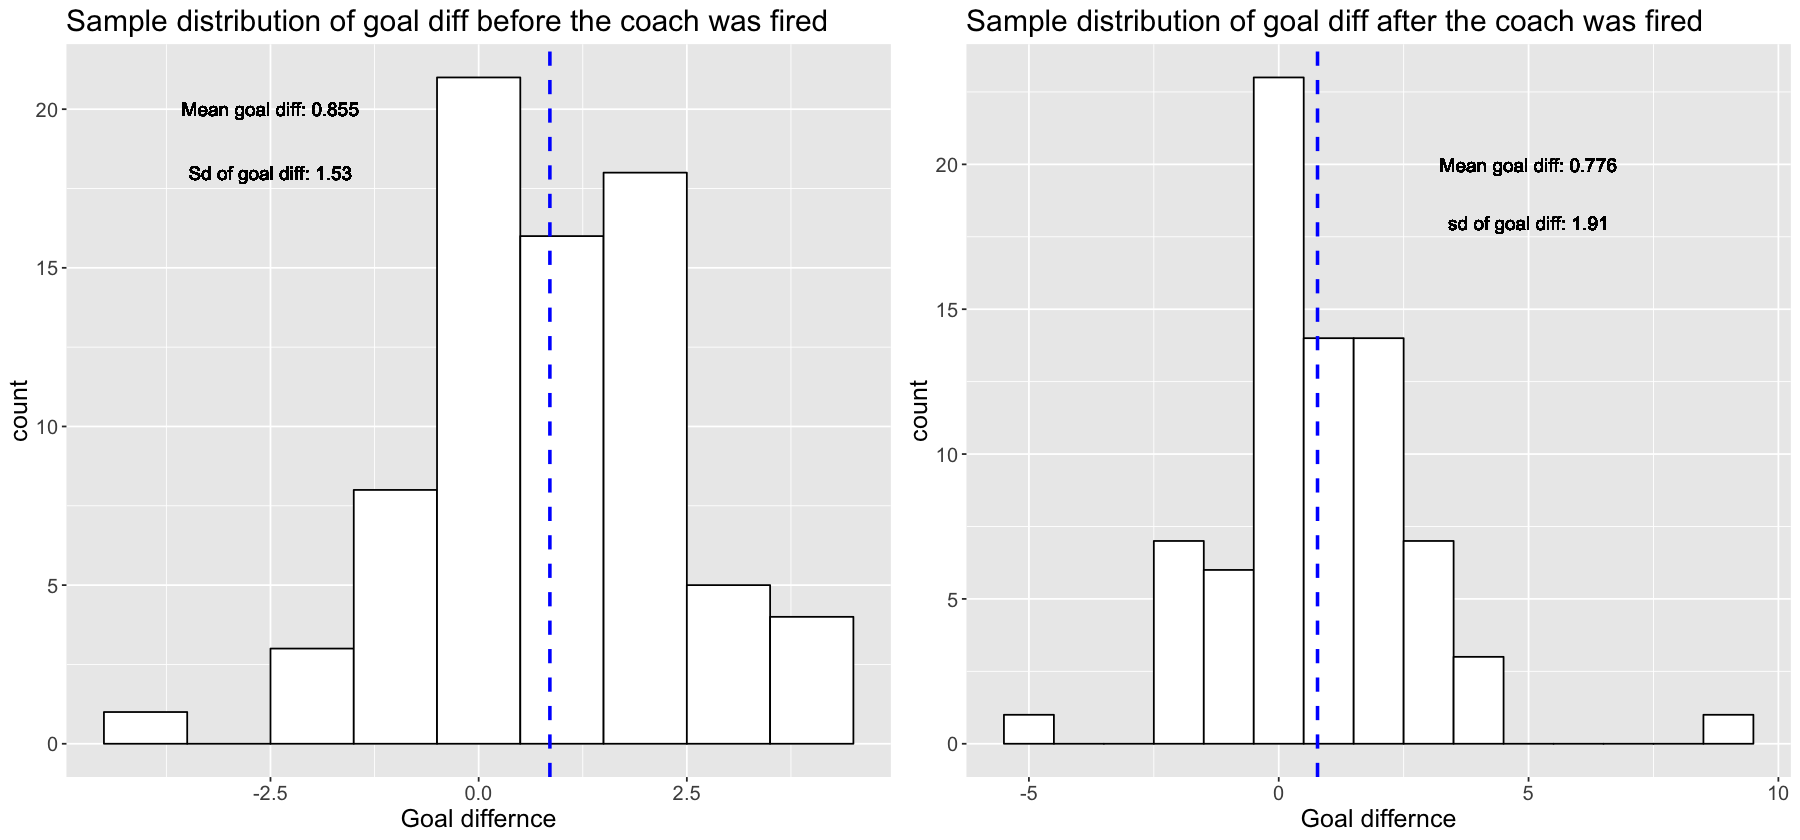

In [4]:
# <------- sample distribution with the old coach ----------------

goal_diff_before_fired_sample_distribution <- old_coach %>%   
ggplot() +
geom_histogram(aes(x = goal_diff), color = "black", fill = "white", binwidth = 1) +
geom_vline(aes(xintercept = mean(goal_diff)), color = "blue", linetype = "dashed", size = 1) + 
geom_text(x = -2.5, y = 20, label = "Mean goal diff: 0.855", size = 4) +
geom_text(x = -2.5, y = 18, label = "Sd of goal diff: 1.53", size = 4) + 
labs(x = "Goal differnce") + 
ggtitle("Sample distribution of goal diff before the coach was fired") +
theme(text = element_text(size = 15))

#---------- Sample distribution with the new coach ----------------

goal_diff_after_fired_sample_distribution <- new_coach %>%  
ggplot() +
geom_histogram(aes(x = goal_diff), color = "black", fill = "white", binwidth = 1) +
geom_vline(aes(xintercept = mean(goal_diff)), color = "blue", linetype = "dashed", size = 1) + 
geom_text(x = 5, y = 20, label = "Mean goal diff: 0.776", size = 4) +
geom_text(x = 5, y = 18, label = "sd of goal diff: 1.91", size = 4) +
labs(x = "Goal differnce") + 
ggtitle("Sample distribution of goal diff after the coach was fired") +
theme(text = element_text(size = 15))

options(repr.plot.width = 15)
plot_grid(goal_diff_before_fired_sample_distribution, goal_diff_after_fired_sample_distribution)

## Methods: Plan

Our report is trustworthy because:
- We obtain results from the dataset, a random sample, that can generalize to the overall performance of United coached by two coaches, the population.
- We use simulation-based and theory-based inferential methods and tend to make precise estimates and draw solid conclusion by setting a low significance level. 

From the histogram above, there is little evidence that Solskjær is better than Mourinho. However, due to sampling variation, we not ready reach a conclusion yet. Therefore, we plan to implement the following statistical methods to address the gap:
- We will use **bootstrap sampling** with `reps = 1000` to measure standard error and calculate confidence intervals at a 95% confidence level for the estimates under mean of goal difference in each replication.

- We will do a **hypothesis test** at 5% significance level (denote $\mu_s$ as mean for Solskjær and $\mu_s$ as mean for Mourinho): 
    * The mean value represents the averaged-out difference in goals of one manager. On mean goal difference:
        * $H_0:\mu_s=\mu_m$​​ 
        * $H_A:\mu_s>\mu_m$​​  
- We plan to approximate **confidence intervals based on Central Limit Theorem** for the mean goal difference, given that the sample size is sufficiently large (152 > 30), roughly taken independently and the mean is a sum of random terms. 
- We will further discuss how the **standard deviation** of goal difference could quantify the team's stability in matches, and explore other statistical parameters that may reflects the United's performance in other aspects.

### Hypothesis testing for means

We will perform a demonstration of hypothesis testing of difference in means using both bootstrapping and asymptotics (CLT). 

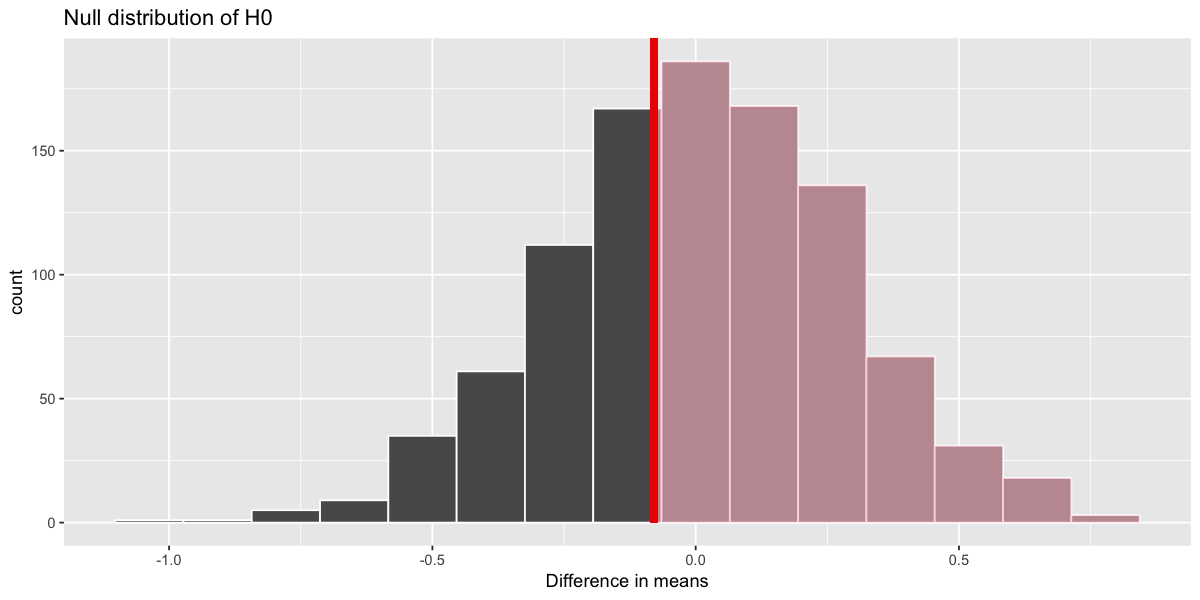

In [72]:
# hypothesis testing: bootstrap
# infer package abstracts the bootstrap process in `generate()`
set.seed(2001)

# construct null model
null_dist_bt <- 
    league_results %>%
    specify(formula = goal_diff ~ coach) %>%
    hypothesize(null = 'independence') %>%
    generate(reps = 1000, type = 'permute') %>%
    calculate(stat = 'diff in means', order = c('new', 'old'))

# plot the observed difference in the null model
visualize(null_dist_bt) +
    shade_p_value(obs_diff_mean, direction='right') +
    labs(x = 'Difference in means', title = 'Null distribution of H0')

options(repr.plot.width = 5)

In [69]:
# Take a look at the p-value we obtained
p_value_bt <- get_p_value(null_distribution, obs_diff_mean, direction='right') %>% as.numeric
p_value_bt

[1] 0.646

In [1]:
# hypothesis testing: asymptotics

# standard errors
obs_diff_se <- sqrt(obs_stat$sd[1]^2 / obs_stat$n[1] + obs_stat$sd[2]^2 / obs_stat$n[2])

# test statistic
ts <- obs_diff_mean / obs_diff_se

# obtain p_value
p_value_as <- pnorm(ts, lower.tail = FALSE)
p_value_as

ERROR: Error in eval(expr, envir, enclos): object 'obs_stat' not found


We can make several claims based on the results we obtained above:
- Notice how the p-value obtained from bootstrapping $p_0=0.646$ is slightly different from the results from CLT $p_1 = 0.610$. This is because bootstrapping includes repetitively samplings with replacement, and CLT estimates a non-perfect sampling distribution by a perfect bell-shaped curve. Errors could be introduced in these process. 
- Despite the difference in p-values, both values are large enough $p_0>p_1>0.05$ to reject $H_0$. Therefore, the mean goal difference under 76 Premier League matches for Solskjær is not higher than Mourinho.

These findings provide insights about the performance of each coach and shed light on future decision making, which will benefit the stakeholders of United. This study leads to future questions like: hypothesis testing on the win rate; take in more explanatory variables to measure performance.

## References

Tatiana Fazenda, Aldo M. Costa, Alexandre Garcia-Mas, Pedro G. Carvalho. (2021). How media influence is perceived by professional soccer players: a qualitative case study in Portugal.

BBC. (2018). Jose MOURINHO: Manchester UNITED sack manager. BBC Sport. https://www.bbc.com/sport/football/46603018. 

ESPNFC. (2013). Greatest managers, No. 9: Jose Mourinho. https://web.archive.org/web/20131023073918/http://espnfc.com/news/story/_/id/1514848/. 

Hvattum, L. M., & Arntzen, H. (2009, November 19). Using ELO ratings for match result prediction in association football. International Journal of Forecasting. 